In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
# data (i am taking one column for all the operations we perform)
df = sns.load_dataset("titanic")  # returns the titanic dataset.
selected_feature = df["age"]
# selected_feature.head()

# **Data Collection**



*   we need to collect the data or dataset from any source.
*   we can make a dataset by using **Web Scrapping** technology.

#    **Data Preprocessing**


*   we need to understand clearly about the data before going to work with the data.
*   that means, we need to check whether there are duplicate features or not and null values or not.if , there is any duplicates or null values we remove or update according to requirements.
*   simply,we need to have a clear idea about the data we have.


#####   **Before going to Feature Engineering we need to split the data into Training part and Testing part to overcome the data leakage problem.**

#   **Feature Engineering**

*   **Feature engineering** is a critical step in the machine learning pipeline. It involves selecting, modifying, and creating features (input variables) from raw data to improve the performance of a machine learning model. This process often requires domain knowledge, creativity, and experimentation.

*  **NOTE :** we always work with **INDEPENDENT FEATURES**
*  first we need to divide independent features as numerical and categorical.
*  after that, we need to apply the feature engineering operations on numerical data of **X_train** and **X_test** simultaniously.
*  after completing with numerical data.we will go with categorical data.**we need to convert the categorical data into numerical data before going to apply feature engineering operations.**

 ### **Different Opearations in Feature Engineering :**

  *   **Handling Missing Values**
  *   **Variable Transformation**
  *   **Handling Outliers**
  *   **Feature Scalling**

 #### **Handling Missing Values :**
it is nothing but filling NaN values or null values with valid values feature wise

* We have different Techniques to Handle Missing Values :(we need to select the best on according to featue requirements)
  *   **Mean Imputation**
  *   **Median Imputation**
  *   **Mode Imputation**
  *   **Random Sample Imputation**      

 ##### **Mean Imputation :**
 * Mean imputation works best for continuous (numerical) variables.
 * If the missing values are random and do not depend on any other variable or the feature itself, mean imputation is acceptable.
 * When the Feature has Low Variance, mean imputation is acceptable.
 * in this technique we will fill all the null values with the **Mean of X_train**
 * in **X_test** also we need to fill the null values with the **Mean of X_train** only.

 **Median and Mode also same like Mean but null values filled with Median or Mode accordingly.**

 * in these 3 techniques all the null values filled with single value (mean or median or mode) repeatedly.

In [ ]:
# Mean Imputaion Technique ;
data = pd.DataFrame()
data["age"] = selected_feature
data.isnull().sum() # we have 177 null values so, we need to fill with mean value.
data["age_mean"] = data["age"].copy()
data["age_mean"] = data["age_mean"].fillna(df["age"].mean())
print(data["age"].isnull().sum())
print(data["age_mean"].isnull().sum())

177
0


In [ ]:
# Median and Mode also same like Mean but null values will be filled with Median and Mode accordingly.
# Median Imputation
data["age_median"] = data["age"].copy()
data["age_median"] = data["age_median"].fillna(data["age"].median())
# Mode Imputation
data["age_mode"] = data["age"].copy()
data["age_mode"] = data["age_mode"].fillna(data["age"].mode())

##### **Random Sample Imputation :**
it is a handling missing values technique.in this all the null values filled with unique values. those are randomly selected non null values from that perticular variable or column or feature.

In [ ]:
data["random_age"] = data["age"].copy()
random_values = data["age"].dropna().sample(data["age"].isnull().sum())
# data["age"].dropna() => returns feature without null values .
# sample(data["age"].isnull().sum()) => ir returns 177 random values from non null values of age column (177 => age column has 177 null values.)
random_values.index = data[data["age"].isnull()].index # matching indexes
data.loc[data["age"].isnull() , "random_age"] = random_values # filling null values in random_age column with random values.

In [ ]:
# now we need to check the best technique to handle missing values for this perticular feature.
# checking graphically.
def checking_handeled_missing(data,column_name,original) :
  print(f'***************************          {column_name}            *******************************')
  plt.figure(figsize=(6,8))
  data[original].plot(kind = "kde" , color = "r" , label = "Original_"+column_name)
  data[column_name].plot(kind = "kde" , color = "black" , label = "updated_" + column_name)
  plt.legend(loc = 0)
  plt.show()
  print(f"Standard Deviation of Original Column : {data[original].std()}")
  print(f"Standard Deviation of Updated Column : {data[column_name].std()}")
  print()


**To check and confirm the best technique we can use Standard Deviation**
* we create different columns with different techniques.so , we can compare the standard deviation original column with each column we have created.
  * **we can confirm the best technique which is having closer standard deviation to orginal standard deviation.**

***************************          age            *******************************


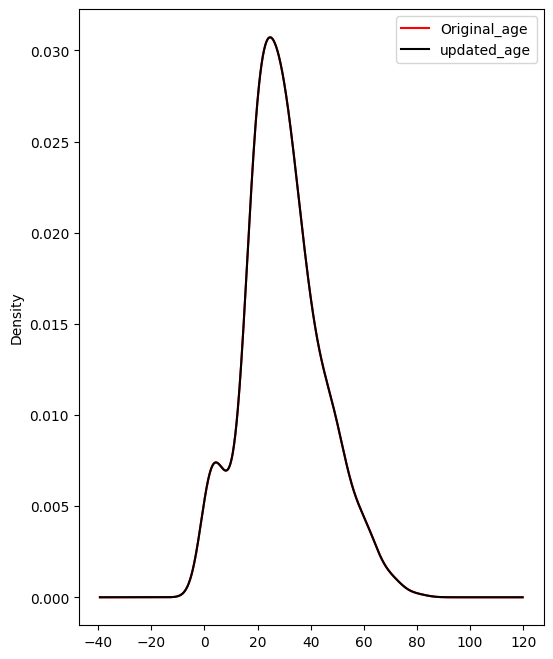

Standard Deviation of Original Column : 14.526497332334044
Standard Deviation of Updated Column : 14.526497332334044

***************************          age_mean            *******************************


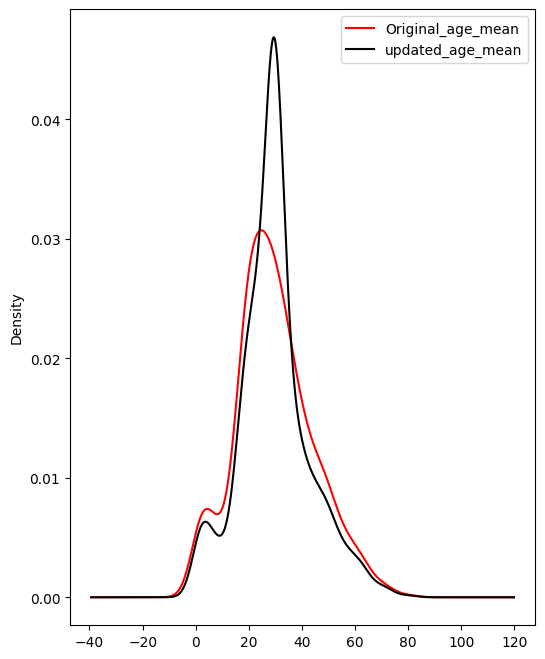

Standard Deviation of Original Column : 14.526497332334044
Standard Deviation of Updated Column : 13.002015226002884

***************************          age_median            *******************************


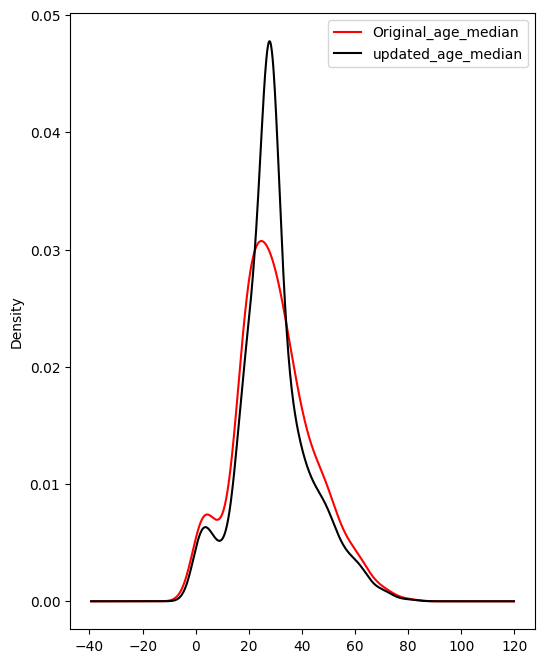

Standard Deviation of Original Column : 14.526497332334044
Standard Deviation of Updated Column : 13.019696550973194

***************************          age_mode            *******************************


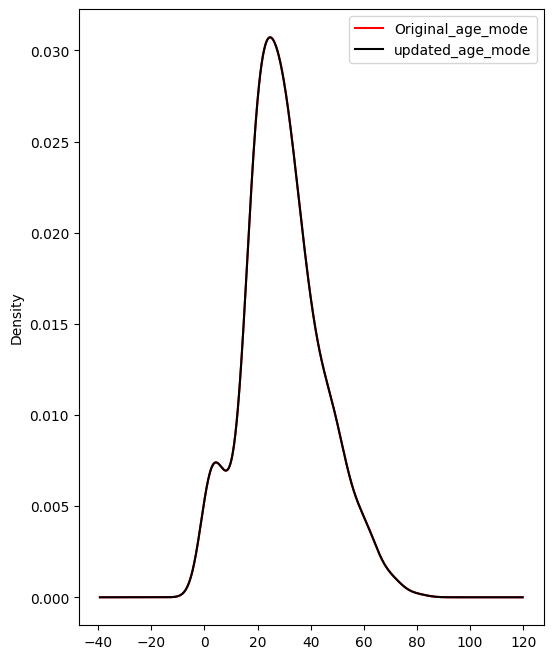

Standard Deviation of Original Column : 14.526497332334044
Standard Deviation of Updated Column : 14.526497332334044

***************************          random_age            *******************************


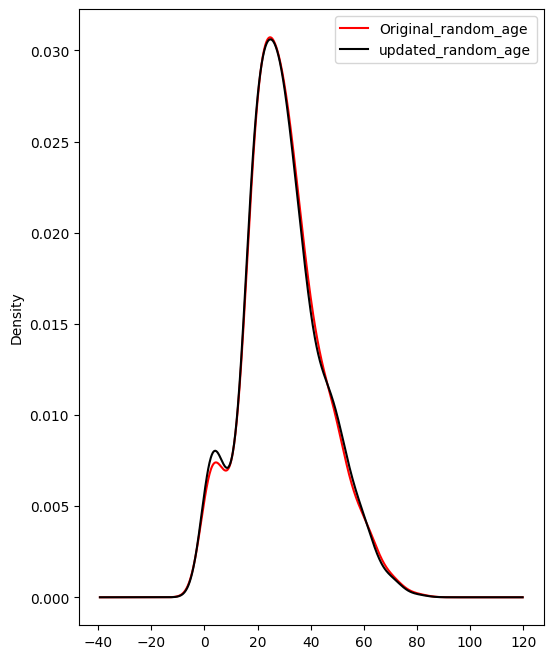

Standard Deviation of Original Column : 14.526497332334044
Standard Deviation of Updated Column : 14.603476944803704



In [ ]:
# visualization of the data to check the best technique.
for i in data.columns :
  checking_handeled_missing(data , i , "age")

## **Variable Transformation**
* **Variable transformation** is the process of changing the way a variable is represented in a dataset to make it more useful for analysis or modeling. This could involve changing the scale, distribution, or units of the data.
* Generally, if a feature folloing **Normal Distribution** we can say that the feature is perfect feature.because , 99% of data of the column is safe which is following perfect bell curve(Normal Distribution).
  * In a normal distribution, the data is evenly distributed around the mean. This makes it easier to interpret and apply statistical methods.
  * Most of the data (about 68%) lies within one standard deviation from the mean. This helps summarize the data effectively.
  * Many statistical tests (e.g., t-tests, ANOVA, regression analysis) and machine learning algorithms assume that the data follows a normal distribution. If the data deviates too much from normality, the results may become inaccurate.
  * **Linear Models** (like linear regression) and many machine learning models (e.g., SVMs, neural networks) perform better when the input variables follow a normal distribution.

 #### **Different Variable Transformation Techniques :**
  * **log Transformation :**
    * applying the logarithmic function to the values of a variable.
    * **Reduce Skewness:** For variables with a right-skewed (long tail on the right) distribution, log transformation compresses the range of large values, bringing the data closer to a normal distribution.
    * **Handle Outliers:** Log transformation minimizes the impact of very large values (outliers), as the logarithm grows much slower than the original values.
    * **Stabilize Variance:** For data with non-constant variance (heteroscedasticity), log transformation can stabilize the variance and improve model assumptions.
    * **New value(y) = log(x)** "x = value before transformation"

In [ ]:
d = data["age_mean"] # data["age_mode"] => above updated column filled null values with mode value.

In [ ]:
# log transformation :
data = pd.DataFrame() # new dataframe created.
data["age"] = d
data["age_log"] = np.log(data["age"] + 1) # created a new column with log values of "age" column.
# np.log(data["age"]) applies log for each value in age column and return the log values
#  "1"  if any value in "age" column 0 then log can not work for that,because log(0) = infinity. so, we need to add 1 for each value in the column to overcome error.
data.head()

,age,age_log
0,22.0,3.135494
1,38.0,3.663562
2,26.0,3.295837
3,35.0,3.583519
4,35.0,3.583519


  ##### **Reciprocal Transformation**
   * A reciprocal transformation is a mathematical transformation where each value in a variable is replaced by its reciprocal, calculated as: **New value(y)  =  1/x**
   * Reciprocal transformation is used to address specific data issues, including:
    * **Reducing Right Skewness:**
      * Like log and square root transformations, it reduces the impact of large values and makes data more symmetric.
      * The effect is more pronounced than log or square root transformations.
    * **Stabilizing Variance:**
      * It helps in cases where variance decreases with increasing values of the variable.
    * **Linearizing Relationships:**
      * It can convert some nonlinear relationships into linear ones, improving model performance.
    * **Handling Inverse Proportions:**
      * For datasets where smaller values have more importance or influence than larger values (e.g., speed and time inversely related).

* **for this technique also we need to add some small value to overcome zero division error when data has 0 as a value.**

In [ ]:
data["age_reciprocal"] = 1/data["age"] # creating new column with the reciprocal values of the column "age".

In [ ]:
data.head()

,age,age_log,age_reciprocal
0,22.0,3.135494,0.045455
1,38.0,3.663562,0.026316
2,26.0,3.295837,0.038462
3,35.0,3.583519,0.028571
4,35.0,3.583519,0.028571


##### **Square Root Transformation**
  * **A square root transformation** is a mathematical operation where you take the square root of each value in a variable.
    * **New Value(y) =  sqrt(x)**
  * If the data contains zero or negative values, you can adjust it by adding a constant "K"
    * **y = sqrt(x+k)**
  * **When to Use Square Root Transformation**
    * When the data is right-skewed (long tail on the right).
    * When the values are positive or zero. For zero or negative values, add a constant "K" > 0 before transformation.
  * **Reduce Right Skewness:**

    * Square root transformation reduces the influence of large values, making the data more symmetric.
  * **When to Avoid Square Root Transformation**

    * If the data is already close to normal distribution or symmetric.
    * If the data contains negative values that cannot be adjusted meaningfully.


In [ ]:
# square root transformation :
data["age_sqrt"] = np.sqrt(data["age"]) # creating a new column with the sqrt values of the column "age".
data.head()

,age,age_log,age_reciprocal,age_sqrt
0,22.0,3.135494,0.045455,4.690416
1,38.0,3.663562,0.026316,6.164414
2,26.0,3.295837,0.038462,5.099020
3,35.0,3.583519,0.028571,5.916080
4,35.0,3.583519,0.028571,5.916080


##### **Exponential Transformation**
* **Exponential Transformation** is a transformation technique in this the variable is transformed by applying exponent function .
* **Y = e^x**    "(   e ~ 2.718 )"
* **Why Use Exponential Transformation?**
  * **Stretching Compressed Data:**
    * If a variable has been previously compressed (e.g., with a log transformation), exponential transformation can reverse it and restore the original scale.
  * **Handling Left-Skewed Data:**
    * For variables with a left-skewed distribution, exponential transformation can amplify small values and reduce skewness.
  * **Data Normalization:**
    * When applied to probabilities or percentages, exponential transformation can re-scale the values to create exponential patterns.

* **When to Use Exponential Transformation**
  * When you have left-skewed data (long tail on the left).
  * When data represents exponential growth or needs to be amplified.
  * When reversing prior log transformations to return data to its original scale.
* **Disadvantages :**
  * Exponentially increasing values can make large outliers even more extreme.
  * Requires adjustments (e.g., adding a constant) for negative or zero values.
  * Amplifies right skewness instead of reducing it, making it unsuitable for right-skewed datasets.


In [ ]:
data["age_exp"] = np.exp(data["age"]) # creating new column with exponet values of the column "age".
data.head()

,age,age_log,age_reciprocal,age_sqrt,age_exp
0,22.0,3.135494,0.045455,4.690416,3.584913e+09
1,38.0,3.663562,0.026316,6.164414,3.185593e+16
2,26.0,3.295837,0.038462,5.099020,1.957296e+11
3,35.0,3.583519,0.028571,5.916080,1.586013e+15
4,35.0,3.583519,0.028571,5.916080,1.586013e+15


##### **Box Cox transformation**
* The Box-Cox transformation is a versatile technique that allows you to automatically determine and apply the most appropriate transformation for a dataset based on the value of  "λ" . This makes it a powerful tool for normalizing data, stabilizing variance, and handling skewness.
* Simply , box cox technique is useful to perform different transformation techniques according to 𝜆 value.

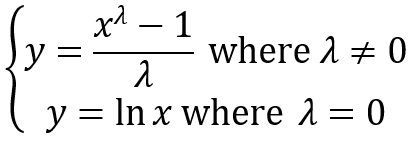

  * **𝜆 = 1 :-**  No transformation needed (keep original data). we use	When the data is already normal.
  * **𝜆 = 0 :-** Logarithmic transformation (
ln
⁡
(
𝑦
)
ln(y)). we use 	For highly right-skewed data.
  * **𝜆 = 0.5 :-** Square root transformation (
𝑦
y
​
 ). we use	For moderately skewed data.
  * **𝜆 < 0 :-** Reciprocal or inverse transformation. we use	To handle extreme outliers or large values.
  * **𝜆 > 1 :-** Power transformation (
𝑦
𝜆
y
λ
 ). we sue	For left-skewed data (long tail on the left).

In [ ]:
# we know that box-cox is statstical technique. so , we need to import stats.
from scipy import stats

In [ ]:
data["age_box_cox"],alpha = stats.boxcox(data["age"],lmbda=None) # we can give any value to the 𝜆 according to column status.
# creating new column with box cox technique . Note: it returns error if the original column has negative values.
# alpha = 𝜆 ; in python lambda is a keyword.that is why we used alpha instead of lambda.

In [ ]:
data.head()

,age,age_log,age_reciprocal,age_sqrt,age_exp,age_box_cox
0,22.0,3.135494,0.045455,4.690416,3.584913e+09,14.251664
1,38.0,3.663562,0.026316,6.164414,3.185593e+16,23.036652
2,26.0,3.295837,0.038462,5.099020,1.957296e+11,16.531179
3,35.0,3.583519,0.028571,5.916080,1.586013e+15,21.449594
4,35.0,3.583519,0.028571,5.916080,1.586013e+15,21.449594


In [ ]:
def visualization_Transformation(data , column) :
  print(column)
  plt.figure(figsize=(12,3))
  plt.subplot(1,3,1)
  plt.title("Normal Distribution")
  data[column].plot(kind="kde" , color = "r")
  plt.subplot(1,3,2)
  plt.title("BoxPlot")
  sns.boxplot(x = data[column], color = "b")
  plt.subplot(1,3,3)
  plt.title("ProbPlot")
  stats.probplot(x = data[column] , dist = "norm" , plot = plt)
  plt.show()

age


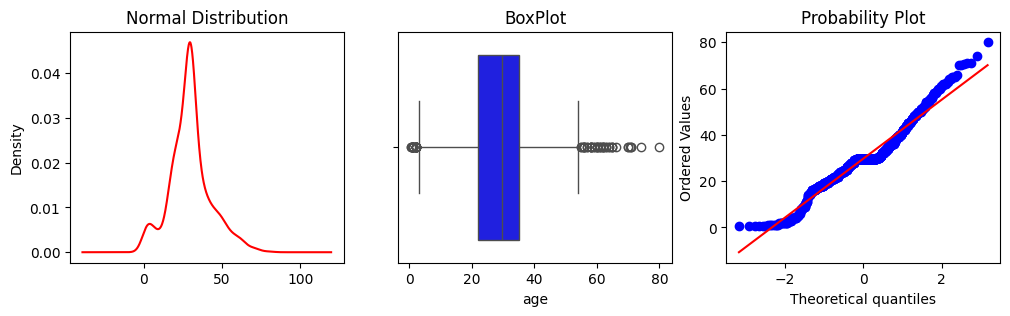

age_log


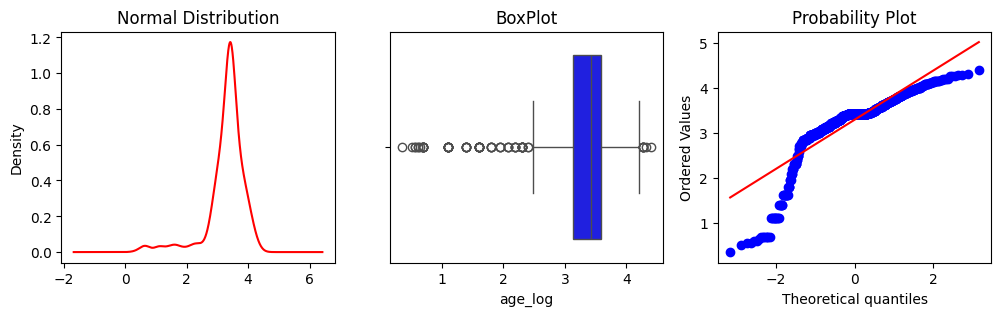

age_reciprocal


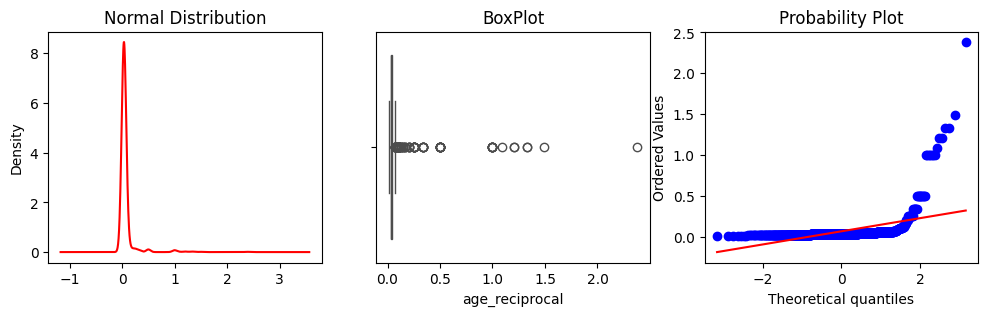

age_sqrt


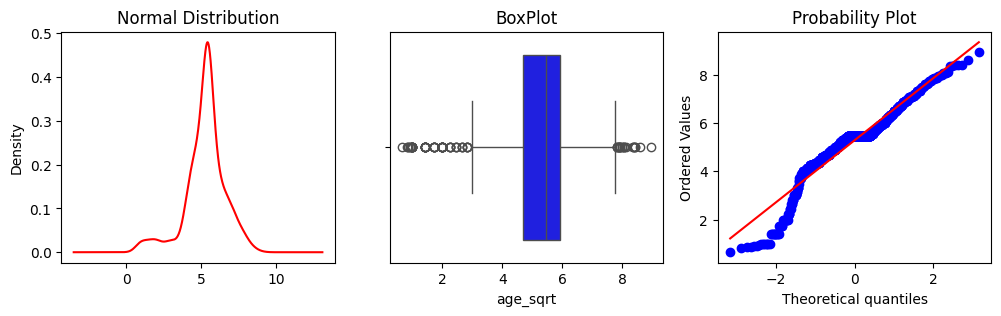

age_exp


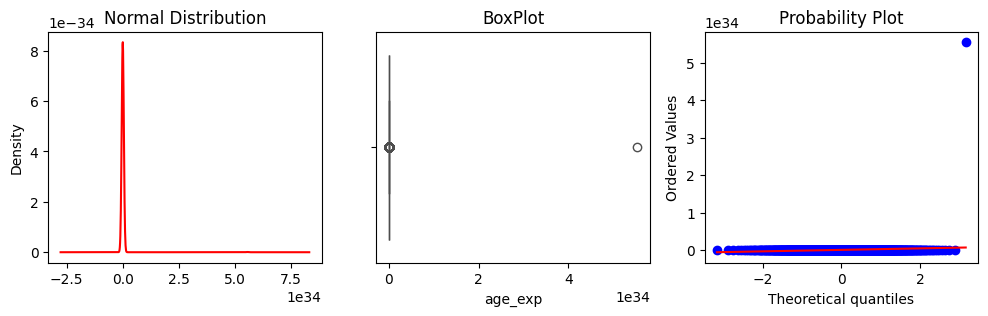

age_box_cox


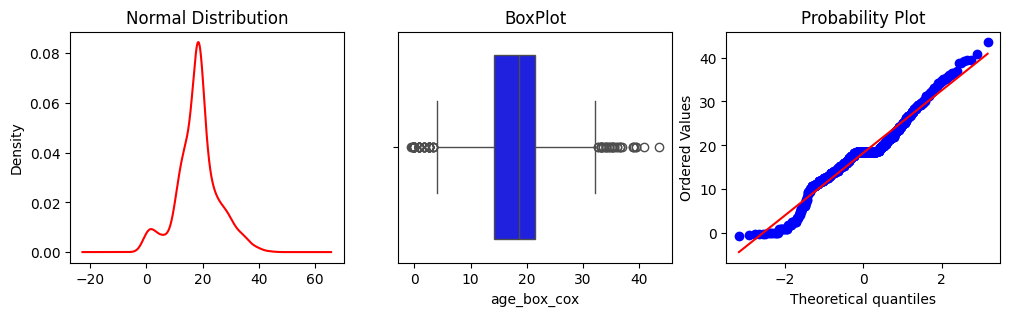

In [ ]:
for i in data.columns :
  visualization_Transformation(data , i)

## **Handling Outliers**
* **Outliers** are nothing but the values outside the **Lower Limit** and **Upper Limit** .
  * **IQR**(inter quartile range) : quantile(0.75) - quantile(0.25).
  * **Lower Limit :** quantile(0.25) - (IQR*1.5).
  * **Upper Limit :** quantile(0.75) + (IQR*1.5). we can take 3 instead of 1.5 according to data.
* **Different Techniques to handle Outliers:**
  * **Trimming**
  * **Capping**

  ##### **Trimming :**
  * **Trimming** is a method used in outlier handling to remove extreme values from a dataset that might skew the results of analysis. Instead of imputing or transforming the outliers, trimming excludes them entirely.
  * **Advantages:**
    * Simple and intuitive.
    * Removes the influence of extreme values on the analysis.
  * **Disadvantages:**
    * Loses information by discarding data points.
    * Not suitable if outliers are meaningful or represent rare but valid phenomena.

  ##### **Capping :**
  * **Capping** is another method used in outlier handling, where extreme values are replaced (or "capped") with a predefined upper or lower limit instead of removing them. This approach is also known as winsorization and helps to reduce the impact of outliers while keeping all data points in the dataset.

In [ ]:
# Trimming with different methods :
a = pd.DataFrame(selected_feature)
a["mode_age"] = a["age"].copy()
a["mode_age"] = a["mode_age"].fillna(a["age"].mode()[0])

In [ ]:
# Trimming the points outside of lower imit and upper limit
IQR = a['mode_age'].quantile(0.75) - a["mode_age"].quantile(0.25)
lower_limit = a["mode_age"].quantile(0.25) - 1.5*(IQR)
upper_limit = a["mode_age"].quantile(0.75) + 1.5*(IQR)
trimmed_age = a["mode_age"].drop([i for i in a["mode_age"].index if a["mode_age"][i] < lower_limit or a["mode_age"][i] > upper_limit] , axis = 0)
len(trimmed_age),len(a["mode_age"])

(825, 891)

In [ ]:
# Trimming the points outside of lower imit and upper limit ; here lower limit is 5th % of data and upper limit is 95th % of the data.
l_l = a["mode_age"].quantile(0.05)
u_l = a["mode_age"].quantile(0.95)
trimmed_age = a["mode_age"].drop([i for i in a["mode_age"].index if a["mode_age"][i] < l_l or a["mode_age"][i] > u_l])
len(trimmed_age) , len(a["mode_age"])

(805, 891)

In [ ]:
# Trimming the points outside of lower imit and upper limit ; here lower limit is -3rd STD of data and upper limit is +3rd STD of the data.
l_l = a["mode_age"].mean() - 3*(a["mode_age"].std())
u_l = a["mode_age"].mean() + 3*(a["mode_age"].std())
trimmed_age = a["mode_age"].drop([i for i in a["mode_age"].index if a["mode_age"][i] < l_l or a["mode_age"][i] > u_l])
len(trimmed_age) , len(a["mode_age"])

(884, 891)

#### **Capping**
* Capping also same like trimming but in capping we impute values instead of removing outliers.
* replacing outliers with upper nound and lower bound.

In [ ]:
# capping with different methods :
d = pd.DataFrame(a["mode_age"])
# replacing outliers with lower limit and upper limit ; here lower_limit = q1 - iqr*1.5 and upper_limit = q3 + iqr*1.5 ;
iqr = d["mode_age"].quantile(0.75) - d["mode_age"].quantile(0.25)
l_l = d["mode_age"].quantile(0.25) - 1.5*iqr
u_l = d["mode_age"].quantile(0.75) + 1.5*iqr
d["up_age_1"] = np.where(d["mode_age"] > u_l , u_l ,np.where( d["mode_age"] < l_l , l_l , d["mode_age"])) # d["up_age_1"] = d["mode_age"].clip(lower=l_l, upper=u_l)


In [ ]:
# replacing outliers with lower limit and upper limit ; here lower_limit = 5th quantile  and upper_limit = 95th quantile ;
l_l = d["mode_age"].quantile(0.05)
u_l = d["mode_age"].quantile(0.95)
d["up_age_2"] = d["mode_age"].clip(lower=l_l, upper=u_l)


In [ ]:
# replacing outliers with lower limit and upper limit ; here lower_limit = mean - 3rd std  and upper_limit = mean + 3rd std ;
l_l = d["mode_age"].mean() - 3*(d["mode_age"].std())
u_l = d["mode_age"].mean() + 3*(d["mode_age"].std())
d["up_age_3"] = d["mode_age"].clip(lower=l_l, upper=u_l)


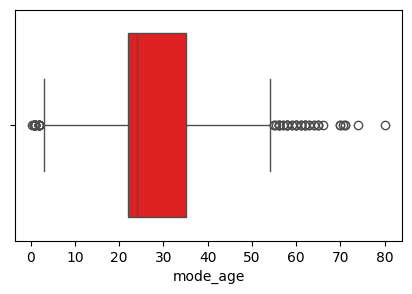

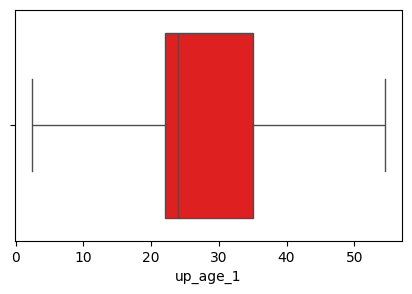

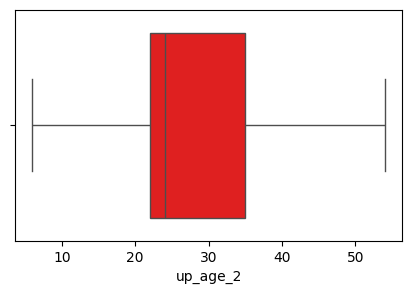

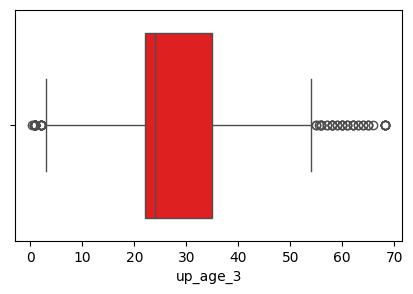

In [ ]:
for i in d.columns:
  plt.figure(figsize= (5,3))
  sns.boxplot(x = d[i] , color = "r")
  plt.show()

## **Dealing with Categorical(Text) Data**
* we need to convert text to Numerical data .
* we know that categorical data is 2 types :
  * **Nominal :** Data that represents categories with no inherent order or ranking.each label in the column will have equal preference.
    * Example: Colors (Red, Blue, Green) → No meaningful way to rank these.
  * **Ordinal :** Data that represents categories with a meaningful order or ranking, but the differences between the categories are not measurable or consistent.
    * Example: Satisfaction Levels (Poor, Average, Good) → "Good" is better than "Average," which is better than "Poor."

* we have modules to encode categorical data in scikit-learn.
  * **OrdinalEncoder**
    * Purpose: Converts categorical features into integers that reflect an arbitrary order.

    * How It Works:

      * Each unique category is assigned a unique integer.
      * The integers do not have any meaningful relationship (e.g., 0 < 1 < 2 does not imply ranking).
    * Output: A single column with integer values.
  * **OneHotEncoder**
    * Purpose: Converts categorical features into a binary matrix where each unique category is represented as a separate column.

    * How It Works:

      * Each category is represented as a binary vector (1 for the category present, 0 for others).
      * This avoids introducing an implicit order among categories.
    * Output: A sparse or dense matrix with one column per category.
  * **LabelEncoder**
    * it is used to convert the target(dependent) variable.

  * we need to import modules from sklearn :
    * onehotencoder()
    * labelencoder()
    * ordinalencoder()

after cleaning and converting all the data ne need to combine numerical and categorical data together.

## **Data Balancing :**
* before going to train the model we need to check whether the data is balanced or not. if the data is unbalanced we need to balance the data using different techniques.
  * **Data Balance :** if the value counts of each label in the target varible is closer to each other. then we can say the data is balanced.otherwise we need to balance the data to predict good results with model.
  * **undersampling Technique :** in this technique data is balanced by decreasing the rows having the label which has highest value counts to balance.(with this technique we loss data)
  * **oversampling Technique :** in this data is balanced with increasing rows having label which has less value count.
    * it has two types :
      * Duplicating : repeating same rows to balance.
      * Synthetic sampling : making new rows with miner changes in independent data.
  
  * to perform in code we need to import modules from **implearn**
    * **from implearn.oversampling import SMOTE**
    * Synthetic Minority Oversampling Technique (SMOTE)

**Before  going to train the model we need to Sclale Down the values of Numerical Variables that to perticularly Continious variables :**
## **Feature Scaling(Scale Down) :**
* feature scaling is nothing but scaling down the values with different techniques.
  * Standard Scalling(Z-Score) : Scaling down the values in a variable using its **Mean** and **Standard Deviation**.
    * Formula :- **(each point - Mean of variable) / STD of the variable**
    * we have module in sklearn.preprocessing **StandardScaler(data)**
    * it will returns the scale downed data .
    * scale downed data will be range of -3 to +3 only.
    * distribution will be same as original data.
    * after scaling down the Mean will become 0 .
  * Min-Max Scalling : Scalling down the values using **Minimum** and **Maximum** values of the variable .
    * Formula :- **(each point - Min of variable) / (Max of variable - Min of variable)**
    * we have module in sklearn.preprocessing **MinMaxScaler(data)**.
    * it will returns the scale downed data .
    * scale downed data will be range of 0 to 1 only.
    * distribution will be same as original data.
    * after scaling down the Mean will be in between 0 to 1.

In [ ]:
# featire scaling :
d = data["age"]
print(d.mean())
print(d.std())

29.69911764705882
13.002015226002884


In [ ]:
# scaling down Manually using "Z-Score" :
n_d = []
for i in d :
  scaled_value = (i - d.mean()) / d.std()
  n_d.append(scaled_value)
n_d = pd.Series(n_d)

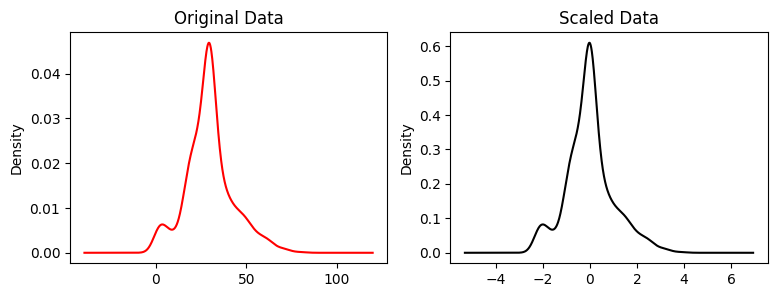

In [ ]:
# ploting original and scaled values ;
plt.figure(figsize=(9,3))
plt.subplot(1,2,1)
plt.title("Original Data")
d.plot(kind = "kde" , color = "r")
plt.subplot(1,2,2)
plt.title("Scaled Data")
n_d.plot(kind = "kde" , color = "black")
plt.show()

In [ ]:
d.head()

,age
0,22.0
1,38.0
2,26.0
3,35.0
4,35.0


In [ ]:
age_data = pd.DataFrame()
age_data["original_data"] = d

In [ ]:
age_data.head()

,original_data
0,22.0
1,38.0
2,26.0
3,35.0
4,35.0


In [ ]:
age_data.shape

(891, 1)

In [ ]:
# scaling down using library ;
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
scaled_data = ss.fit_transform(age_data[["original_data"]])


In [ ]:
age_data["scaled_age"] = scaled_data

In [ ]:
age_data.head()

,original_data,scaled_age
0,22.0,-0.592481
1,38.0,0.638789
2,26.0,-0.284663
3,35.0,0.407926
4,35.0,0.407926


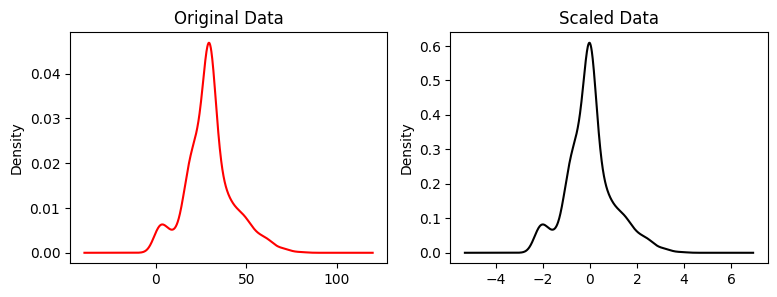

In [ ]:
# ploting original and scaled values ;
plt.figure(figsize=(9,3))
plt.subplot(1,2,1)
plt.title("Original Data")
age_data["original_data"].plot(kind = "kde" , color = "r")
plt.subplot(1,2,2)
plt.title("Scaled Data")
age_data["scaled_age"].plot(kind = "kde" , color = "black")
plt.show()

**Using Min - Max Scalar :**

In [ ]:
# feature scaling using min-max Scalar :
from sklearn.preprocessing import MinMaxScaler
mm = MinMaxScaler()
mm_scaled = mm.fit_transform(age_data[["original_data"]])

In [ ]:
age_data["mm_scaled"] = mm_scaled

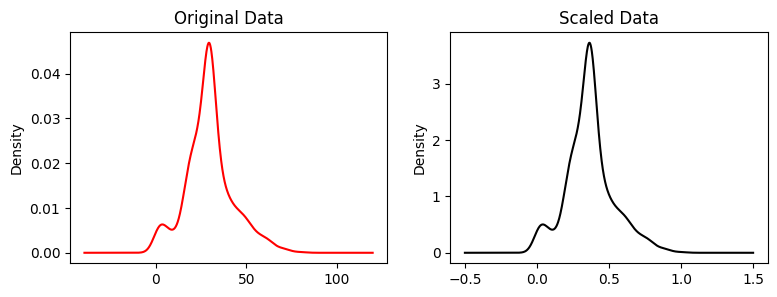

In [ ]:
# ploting original and scaled values ;
plt.figure(figsize=(9,3))
plt.subplot(1,2,1)
plt.title("Original Data")
age_data["original_data"].plot(kind = "kde" , color = "r")
plt.subplot(1,2,2)
plt.title("Scaled Data")
age_data['mm_scaled'].plot(kind = "kde" , color = "black")
plt.show()

**=> After completing all the preprocessing on data we need to train all the algorithms with data and check the performance.**

**=>  After that we need to check each model with best parameters : -> to get best parameters we have a concept called "Hyper parameter Tuning Technique"**

**=> After that we need to select the best Model from all the models with the help of AUC and ROC curves.**

**=> After selecting the best model with best parameters we need to save the model with "pickle" to use in various conditions instead of carrying all the code.**

**=> After saving the model we can deploy with using some Frameworks by importing the model in that file.**